# Árboles de decisión

Hasta el momento hemos considerado problemas de clasificación donde describimos los objetos del mundo real dentro de un espacio de características *numéricas* (ya sean continuas o discretas) y en todos los casos hemos definido algún tipo de medida de distancia entre los objetos dentro de este espacio de características.

Sin embargo (algunos de ustedes ya se dieron cuenta), existen problemas donde las características de los objetos no son numéricas sino *categóricas* (esto es, características descriptivas sin ningún tipo de noción de distancia u ordenamiento). Imaginemos por ejemplo un problema de diagnóstico médico en el que las características son los posibles síntomas (fiebre, tos seca o con flema, dolor en una parte específica del cuerpo, etc.) o un problema demográfico en el que tenemos características socio-económicas (barrio de residencia, profesión, lugar de nacimiento, género, etc.). ¿Cómo definiríamos una métrica de similitud?

En estos casos no describimos los objetos por medio de *vectores de características* sino *listas de atributos*. La tarea del aprendizaje de máquina en este escenario consiste en identificar eficientemente las clases de objetos en este espacio **no métrico**.


## Algoritmo ID3

Una forma intuitiva de clasificar el tipo de problemas que hemos descrito es a través de una serie de preguntas (como lo haría un médico o un encuestador que pretende hacer una inferencia con los datos de su encuestado). Esta secuencia de preguntas conforma lo que llamamos un "árbol de decisión". En este tipo de árboles, la clasificación de un patrón en particular comienza en el nodo raíz, en donde se pregunta por el valor de una propiedad en particular. Cada una de las aristas corresponde a los posibles valores de la respuesta, que llevarán al algoritmo al siguiente nodo. En ese nodo se tomará nuevamente una decisión basada en una nueva pregunta y así sucesivamente hasta que se llegue a un nodo hoja, donde no habrá más preguntas por hacer, y en el cual se asignará una clase al objeto en cuestión.

Veamos un ejemplo de cómo se hace el diagnóstico del dengue basándose en los síntomas (Acosta-Torres et. al., 2016).

<img src="tree_dengue.png" width=500/>

Los algoritmos de aprendizaje de maquina buscan entonces construir automáticamente un árbol de decisión **a partir de los datos de entrenamiento**.

La principal dificultad en la construcción de un árbol consiste en decidir cuál característica evaluar en cada nodo. Es importante aclarar que los árboles de decisión no solamente son aplicables para características nominales sino que también pueden usarse con características numéricas. Cuando usamos características numéricas, cada nodo toma la forma de una pregunta del tipo "¿es $x_i < k$?", lo cual genera fronteras de decisión mediante hyperplanos perpendiculares como en la siguiente figura (Geurts et. al., 2009):

<img src="tree_planes.png" width=700/>

El principio fundamental respecto a la creación de árboles es la simplicidad: se deben preferir decisiones que lleven a un árbol simple y compacto con pocos nodos (navaja de Occam: "la respuesta más simple es la más probable"). Esto quiere decir que cada decisión debe dividir el conjunto de datos en subconjuntos con la mayor *pureza* posible, con el fin de hacer la menor cantidad de divisiones. 

La impureza de un nodo la podemos medir usando la entropía de Shannon o entropía de información. Ésta es una medida de la información que contiene una variable aleatoria. En términos simples, la entropía representa el promedio de preguntas que deben hacerse para adivinar la respuesta correcta ante una variable deconocida. Supongamos que pienso un número del 1 al 10 y deben hacerme preguntas para adivinar qué número es... ¿cuántas preguntas serán necesarias en promedio para acertar?.

El valor de la entropía de Shannon para una variable aleatoria $\boldsymbol{x}$ con posibles eventos $x_i$ se calcula como:

\begin{equation}
h(\boldsymbol{x}) = -\sum_{i} p(x_i)\operatorname{log}_2(p(x_i))
\end{equation}

En el ejemplo anterior, $h(x) = 3.3219$ (en promedio se necesitan 3 o 4 preguntas para acertar el número que pensé).

En el caso de los árboles de decisión, la entropía de un subconjunto de datos se calcula con las probabilidades de seleccionar una muestra aleatoriamente para cada una de las clases. En otras palabras, la entropía de un conjunto de datos de $N$ muestras divididas en $C$ clases (considerando equiprobabilidad en las muestras), sería:

\begin{equation}
H(\boldsymbol{X}) = -\sum_{i=1}^C \frac{n_i}{N}\operatorname{log}_2\left(\frac{n_i}{N}\right)
\end{equation}

donde $n_i$ es el número de muestras de la i-ésima clase en el conjunto. Podemos verificar fácilmente que, si el conjunto contiene datos de una sola clase, su entropía será cero. En cambio, si contiene igual número de muestras de cada clase, su entropía será uno. 

Por otro lado, definamos la ganancia de información $IG(\boldsymbol{X},\boldsymbol{x}_i)$ como la diferencia en la entropía antes de dividir el conjunto a través del atributo $\boldsymbol{x}_i$ y después de hacerlo:
\begin{equation}
IG(\boldsymbol{X},\boldsymbol{x}_i)=H(\boldsymbol{X})-\sum _{t\in T}p(t)H(t)
\end{equation}

donde $t \in T$ son los subconjuntos resultantes al dividir al conjunto total a través del atributo $\boldsymbol{x}_i$.

Usando entonces la entropía, podemos construir un árbol de decisión usando diferentes estrategias. Una de las implementaciones más conocidas es el algoritmo ID3 (*Iterative dichotomizer 3*), que funciona de la siguiente manera:

1. Calcular la entropia del conjunto actual de datos $H(\boldsymbol{X})$
2. Para cada atributo, calcular la ganancia de información $IG(\boldsymbol{X},\boldsymbol{x}_i)$ 
3. Seleccionar el atributo con el máximo GI y dividir el nodo actual mediante ese atributo
3. Remover el atributo seleccionado del conjunto de datos
4. Repetir hasta que el árbol sólo tenga nodos hoja o se acaben los atributos


* Acosta-Torres, J., Meneses, L. O., Sokol, N., Sardiñas, R. B., Díaz, D. M., Sansón, R. B., & Arce, M. E. S. (2016). Técnica Árboles de decisión aplicada al método clínico en el diagnóstico del dengue. *Revista Cubana de Pediatría*, 88(4), 441-453.

* Geurts, P., Irrthum, A., & Wehenkel, L. (2009). Supervised learning with decision tree-based methods in computational and systems biology. *Molecular Biosystems*, 5(12), 1593-1605.



Consideremos la siguiente base de datos con variables categóricas, extraida del repositorio de UCI. La base de datos describe el diagnóstico de pacientes oftalmológicos que podrían necesitar lentes de contacto, en tres clases:

1. El paciente necesita lentes de contacto duros.
2. El paciente necesita lentes de contacto blandos.
3. El paciente no necesita lentes de contacto.

Los atributos que describen a cada paciente son los siguientes:

1. Edad: (1) joven, (2) pre-presbítico, (3) presbítico
2. Prescripción:  (1) miope, (2) hipermétrope
3. Astigmático:     (1) no, (2) sí
4. Producción de lágrimas:  (1) reducida, (2) normal

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importamos la base 
lenses=np.loadtxt('/media/jorge/Datos/Docencia/UCaldas/Sistemas Inteligentes II/lenses.data',dtype='str')
data=lenses[:,1:6]

#print(data)

#Calculamos la entropía actual
def entropia(clases):
    unique, counts = np.unique(clases, return_counts=True)
    H=-sum(counts/len(clases)*np.log2(counts/len(clases)))
    return(H)

H=entropia(data[:,4])
print(H)

1.3260875253642983


Ahora, para cada uno de los atributos, vamos a dividir el conjunto de datos total y calcular la ganancia de entropía:

In [4]:
#Ahora calculemos la Ganancia de Información de cada atributo
nfeat=len(data[0])-1
df=pd.DataFrame(data)

GI=np.zeros(nfeat)
for i in range(nfeat):
    grupos=df.groupby([i])
    conteo=grupos.size()
    nuevaent=grupos.apply(lambda x: entropia(x[len(data[0])-1]))
    GI[i] = H-sum(conteo/sum(conteo)*nuevaent)
print(GI)



[0.0393965  0.03951084 0.37700523 0.54879494]


Finamlemente, apliquemos el algoritmo ID3 completo para clasificar un nuevo individuo con los siguientes atributos:

Jorge: pre-presbítico, miope, astigmático, producción de lágrimas normal.

[2, 1, 2, 2]

In [5]:
#Base de datos de entrenamiento. La última columna es la clase.
data_nuevo=lenses[:,1:6]
jorge=np.array(['2','1','2','2'])
parar=0
while parar==0:
    data=data_nuevo;
    nfeat=len(data[0])-1
    H=entropia(data[:,nfeat]) #Calcula la entropía actual
    if(len(np.unique(data[:,nfeat]))==1): #Si la entropía es cero, termina
        salida=data[0,len(data[0])-1] #Devuelve la clase
        parar = 1
    else:
        df=pd.DataFrame(data)
        GI=np.zeros(nfeat)
        for i in range(nfeat): #Ciclo para encontrar la ganancia de información
            grupos=df.groupby([i])
            conteo=grupos.size()
            nuevaent=grupos.apply(lambda x: entropia(x[len(data[0])-1]))
            GI[i] = H-sum(conteo/sum(conteo)*nuevaent)
        pregunta=np.argmax(GI) #Atributo por el cual se debe preguntar
        data_nuevo = data[data[:,pregunta]==jorge[pregunta],:] #Se dejan las muestras que tienen la misma respuesta
        data_nuevo = np.delete(data_nuevo,pregunta,axis=1) #Se borra la columna
        jorge = np.delete(jorge,pregunta)

match salida:
        case '1':
            print(" El paciente necesita lentes de contacto duros.")
        case '2':
            print("El paciente necesita lentes de contacto blandos.")
        case '3':
            print("El paciente no necesita lentes de contacto.")
        case _:
            print('Me lleva')

 El paciente necesita lentes de contacto duros.


Necesito lentes de contacto duros...

## Árboles CART: Classification and Regression Trees

El algoritmo **CART (Classification and Regression Trees)** fue propuesto por Breiman, Friedman, Olshen y Stone en 1984 como una evolución de los árboles tipo ID3/C4.5. Su objetivo es construir **modelos predictivos** (clasificación o regresión) mediante divisiones **binarias** del espacio de atributos.

A diferencia de ID3, que selecciona la mejor partición entre varias categorías posibles de una variable, **CART divide el conjunto en dos ramas** en cada nodo:

\begin{equation}
x_j \leq t \quad \text{o} \quad x_j > t
\end{equation}

donde $x_j$ es un atributo y $t$ un umbral elegido para maximizar la pureza de los nodos hijos.

---

#### Características principales de CART

| Aspecto | Descripción |
|----------|-------------|
| Tipo de salida | Clasificación o regresión |
| Tipo de división | Binaria en cada nodo |
| Criterio de impureza | Índice de Gini (clasificación) o varianza residual (regresión) |
| Poda | Basada en validación cruzada o complejidad del árbol |
| Variables continuas | Se manejan naturalmente (búsqueda de umbral óptimo) |
| Variables categóricas | Se codifican internamente o mediante *one-hot encoding* |

CART crea un árbol que maximiza la pureza de los nodos, pero puede **sobreajustar** los datos si no se limita la profundidad o si no se realiza **poda**.

---

#### Idea general del algoritmo

1. Escoger la mejor división posible $(x_j, t)$ que minimiza la impureza en los nodos hijos.  
2. Repetir el proceso recursivamente sobre cada subconjunto.  
3. Detener el crecimiento según un criterio de parada (por ejemplo, número mínimo de muestras o profundidad máxima).  
4. Podar el árbol si es necesario, eliminando ramas que no mejoran el rendimiento sobre validación.

---

El resultado final es un **modelo jerárquico interpretable** que se puede visualizar como un conjunto de reglas tipo:

> if (edad ≤ 40) and (astigmático = no) then Clase = "blando"

###  Criterio de impureza en CART

Para **clasificación**, el criterio más común es el **índice de Gini**, que mide el grado de mezcla de clases en un nodo.

\begin{equation}
G(t) = \sum_{k=1}^{C} p_{k}(1 - p_{k}) = 1 - \sum_{k=1}^{C} p_{k}^{2}
\end{equation}

donde:
- $C$ es el número de clases,
- $p_k$ es la proporción de muestras de la clase $k$ en el nodo $t$.

El valor de $G(t)$ es **0** cuando todas las muestras del nodo pertenecen a una sola clase (pura),  
y **máximo** cuando las clases están equilibradas (pura aleatoriedad).

---

Para **regresión**, CART utiliza la **varianza residual** como medida de impureza:

\begin{equation}
R(t) = \frac{1}{N_t}\sum_{i=1}^{N_t}(y_i - \bar{y}_t)^2
\end{equation}

donde:
- $N_t$ es el número de muestras en el nodo \(t\),
- $\bar{y}_t$ es la media de los valores objetivo en ese nodo.

---

####  Selección de la mejor división

Para cada nodo, CART busca el atributo $x_j$ y el umbral $t$ que minimicen la impureza ponderada:

\begin{equation}
\text{Criterio}(x_j, t) =
\frac{N_{\text{izq}}}{N} G_{\text{izq}} + \frac{N_{\text{der}}}{N} G_{\text{der}}
\end{equation}

La división con el valor más bajo de este criterio se elige como la mejor.  
Este procedimiento continúa recursivamente hasta que se cumple una condición de parada o el árbol alcanza su máxima profundidad.

###  Poda y control de complejidad

Los árboles completamente desarrollados suelen **memorizar el conjunto de entrenamiento**.  
Para mejorar la generalización, CART aplica **poda por complejidad del costo (Cost-Complexity Pruning)**.

Se define una función de costo penalizada:

\begin{equation}
R_\alpha(T) = R(T) + \alpha |T|
\end{equation}

donde:
- $R(T)$ es el error del árbol \(T\),
- $|T|$ es el número de hojas,
- $\alpha$ es un parámetro de penalización.

A medida que aumenta $\alpha$, el árbol se simplifica.  
El valor óptimo de $\alpha$ se selecciona típicamente mediante validación cruzada.

---

####  Interpretación práctica

- Árboles **muy profundos** → bajo sesgo, alta varianza.  
- Árboles **muy podados** → alto sesgo, baja varianza.  
- El objetivo es encontrar un **punto intermedio** con el mejor equilibrio (*trade-off*) entre ambos errores.

En `scikit-learn`, se controla la complejidad con parámetros como:
- `max_depth`
- `min_samples_split`
- `ccp_alpha` (penalización directa del tamaño del árbol)

In [8]:
import seaborn as sns
df = sns.load_dataset("titanic").dropna(subset=["survived"])  # Ojo: requiere conexión a internet

y = df["survived"]
X = df.drop(columns=["survived", "alive"]) #Se quitan las etiquetas del dataset (hay que quitar también alive que es copia de survived)

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

print(num_cols)
print(cat_cols)

['pclass', 'age', 'sibsp', 'parch', 'fare']
['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



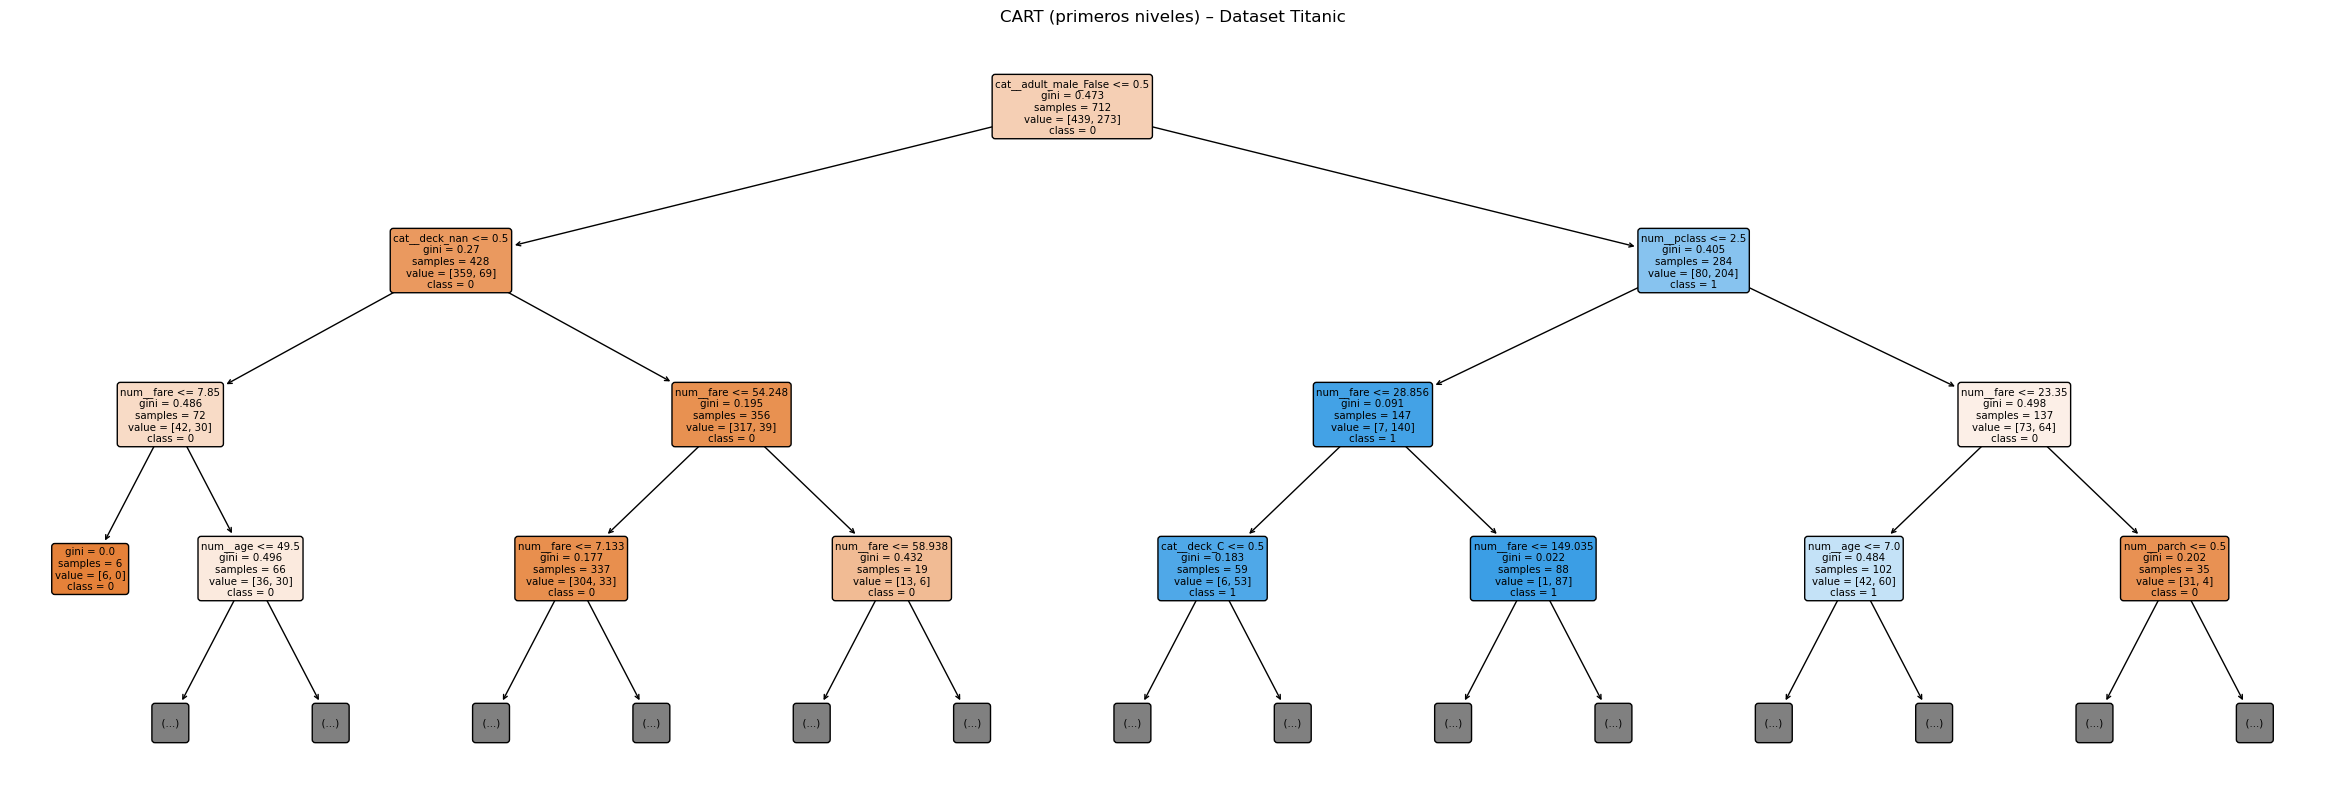

Accuracy CV 5-fold: 0.798 ± 0.013


In [26]:
# CART con scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np, pandas as pd, seaborn as sns


pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

cart = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)
pipe = Pipeline([("pre", pre), ("clf", cart)])

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipe.fit(X_tr, y_tr)
print(classification_report(y_te, pipe.predict(X_te)))

#Gráfica del árbol----------------------------------------------------------------------------
# Obtener nombres de todas las columnas transformadas del ColumnTransformer
feature_names = pipe.named_steps["pre"].get_feature_names_out()

# Transformar X_tr y entrenar el árbol (solo para graficar)
Xtr_enc = pipe.named_steps["pre"].transform(X_tr)
tree_viz = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_viz.fit(Xtr_enc, y_tr)

# Graficar
plt.figure(figsize=(30, 10))
plot_tree(tree_viz,
          filled=True,
          max_depth=3,
          feature_names=feature_names,
          class_names=np.unique(y).astype(str),
          rounded=True)
plt.title("CART (primeros niveles) – Dataset Titanic")
plt.show()
#---------------------------------------------------------------------------------------------

scores = cross_val_score(pipe, X, y, cv=5, n_jobs=-1)
print(f"Accuracy CV 5-fold: {scores.mean():.3f} ± {scores.std():.3f}")





## Random Forests: Bosques Aleatorios

El algoritmo **Random Forest** fue propuesto por Leo Breiman en 2001 como una extensión del método de árboles de decisión (CART) basada en el concepto de **bagging** (*bootstrap aggregating*). La idea central es entrenar **muchos árboles** sobre subconjuntos aleatorios de los datos y de las variables, y luego combinar sus predicciones por **voto mayoritario** (clasificación) o **promedio** (regresión).

---

### Motivación

Un solo árbol tiene bajo sesgo pero **alta varianza**: pequeños cambios en los datos pueden producir árboles completamente distintos.  
Random Forests reducen esa varianza al **promediar muchos árboles independientes**, generando un modelo más estable y robusto.

\begin{equation}
\hat{f}_{RF}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}_b(x)
\end{equation}

donde:
$B$: número de árboles,
$\hat{f}_b(x)$: predicción del árbol \(b\) entrenado sobre una muestra bootstrap.

---

### Diferencias clave frente a un solo árbol (CART)

| Aspecto | Árbol individual | Random Forest |
|----------|------------------|----------------|
| Datos de entrenamiento | Todo el conjunto | Subconjunto aleatorio (*bootstrap*) por árbol |
| Atributos por división | Todos | Subconjunto aleatorio (*feature bagging*) |
| Varianza | Alta | Mucho menor |
| Interpretabilidad | Alta | Media |
| Precisión típica | Moderada | Alta |

---

Los Random Forests se encuentran entre los modelos **más potentes y versátiles** para datos tabulares, combinando buen desempeño con interpretabilidad razonable (por ejemplo, mediante análisis de *feature importance*).

###  Mecanismo de bagging y selección aleatoria de variables

**Bagging** (*Bootstrap Aggregating*) consiste en entrenar cada árbol sobre un subconjunto aleatorio de las observaciones (con reemplazo).  
Aproximadamente el **63%** de las muestras se utilizan para entrenar cada árbol; el **37% restante** no se ve durante su entrenamiento y puede usarse para validar el modelo (*Out-Of-Bag*, OOB).

---

#### Procedimiento del Random Forest

1. Para \( b = 1, 2, ..., B \):
   - Toma una muestra aleatoria con reemplazo del conjunto de entrenamiento.
   - Entrena un árbol CART sobre esa muestra.
   - En cada nodo, selecciona aleatoriamente solo \(m\) de los \(p\) atributos y elige la mejor división entre ellos.

2. Para predecir una nueva muestra \(x\):
   - Cada árbol produce una predicción \(\hat{y}_b\).
   - Se combinan todas las predicciones:
     - Clasificación: **voto mayoritario**
       \[
       \hat{y} = \text{mode}\{\hat{y}_1, \hat{y}_2, ..., \hat{y}_B\}
       \]
     - Regresión: **promedio**
       \[
       \hat{y} = \frac{1}{B}\sum_{b=1}^{B}\hat{y}_b
       \]

---

#### Parámetros más relevantes

| Parámetro | Descripción |
|------------|--------------|
| `n_estimators` | Número de árboles en el bosque |
| `max_features` | Número de variables candidatas en cada división (√p o log₂ p suelen funcionar bien) |
| `max_depth` | Profundidad máxima de los árboles |
| `bootstrap` | Si se usan muestras con reemplazo (True por defecto) |
| `oob_score` | Activa la estimación *out-of-bag* (validación interna) |

---

El efecto de estos parámetros se puede entender como un **control de complejidad colectiva**:  
más árboles → menor varianza,  
menos variables por división → árboles menos correlacionados → bosque más generalizable.

### Evaluación y explicabilidad de Random Forests

Una ventaja práctica de los Random Forests es que permiten **evaluar su rendimiento sin usar un conjunto de validación explícito**, gracias al concepto de **Out-Of-Bag (OOB) score**.

Cada muestra de entrenamiento, en promedio, no se incluye en un tercio de los árboles.  
El modelo puede usarlas como un mini conjunto de prueba interno, estimando una precisión tipo validación cruzada sin costo adicional.

\begin{equation}
\text{OOB score} = \frac{1}{N}\sum_{i=1}^{N} \mathbb{1}\{y_i = \hat{y}^{OOB}_i\}
\end{equation}

---

#### Importancia de las variables (*Feature Importance*)

El Random Forest puede estimar la **relevancia de cada atributo** midiendo la reducción promedio del índice de Gini (o de la impureza) atribuida a cada variable:

\begin{equation}
\text{Imp}(x_j) = \frac{1}{B}\sum_{b=1}^{B} \sum_{t \in T_b} \Delta Gini(t, x_j)
\end{equation}

Estas importancias se normalizan para que sumen 1 y permiten interpretar qué características influyen más en las predicciones.

También se puede usar la **permutation importance**, que evalúa la pérdida de precisión al permutar aleatoriamente una variable, ofreciendo una medida más robusta de su influencia real.

---

Los Random Forests combinan:
- **Alta precisión** incluso sin ajuste fino,
- **Bajo riesgo de sobreajuste**,
- **Estimaciones internas de error (OOB)**,
- **Capacidad de medir importancias de atributos**.

Por eso son considerados un **modelo base fundamental** en aprendizaje supervisado.

              precision    recall  f1-score   support

           0      0.840     0.909     0.873       110
           1      0.833     0.725     0.775        69

    accuracy                          0.838       179
   macro avg      0.837     0.817     0.824       179
weighted avg      0.838     0.838     0.836       179

OOB: 0.801


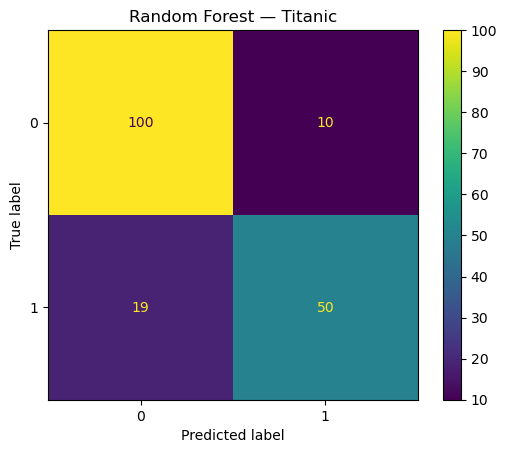

CV(5): 0.8013746783001695


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pre = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                      ("ohe", OneHotEncoder(handle_unknown="ignore"))]), cat_cols)
])

rf = RandomForestClassifier(n_estimators=300, max_features="sqrt", oob_score=True,
                            n_jobs=-1, random_state=42)
pipe = Pipeline([("pre", pre), ("clf", rf)])

pipe.fit(X_tr, y_tr)
y_pr = pipe.predict(X_te)

print(classification_report(y_te, y_pr, digits=3))
print("OOB:", round(pipe.named_steps["clf"].oob_score_,3))

ConfusionMatrixDisplay.from_predictions(y_te, y_pr)
plt.title("Random Forest — Titanic"); plt.show()


from sklearn.model_selection import cross_val_score
print("CV(5):", cross_val_score(pipe, X, y, cv=5, n_jobs=-1).mean())

In [25]:
fn = pipe.named_steps["pre"].get_feature_names_out()
imp = pipe.named_steps["clf"].feature_importances_
pd.DataFrame({"feature": fn, "importance": imp}).sort_values("importance", ascending=False).head(12)

,feature,importance
4,num__fare,0.205469
1,num__age,0.198061
16,cat__adult_male_False,0.068873
5,cat__sex_female,0.058338
14,cat__who_man,0.054083
17,cat__adult_male_True,0.052065
6,cat__sex_male,0.046743
0,num__pclass,0.040115
15,cat__who_woman,0.039003
2,num__sibsp,0.038152
